<a href="https://colab.research.google.com/github/Nachi2006/MLREPO/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



In [4]:
# Load and preprocess CIFAR-10 dataset
def load_and_preprocess_data():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # Normalize pixel values
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Convert labels to categorical
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return X_train, y_train, X_test, y_test



In [5]:
# Build custom CNN model
def build_custom_cnn():
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(32, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Dense Layers
        layers.Flatten(),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model



In [6]:
# Build transfer learning model using VGG16
def build_transfer_learning_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Learning rate scheduler
def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * tf.math.exp(0.1 * (10 - epoch))

# Plot training history
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy plot
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Loss plot
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.show()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Custom CNN model...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 49ms/step - accuracy: 0.3452 - loss: 1.8915 - val_accuracy: 0.5643 - val_loss: 1.2151 - learning_rate: 0.0010
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.5518 - loss: 1.2605 - val_accuracy: 0.6505 - val_loss: 0.9662 - learning_rate: 0.0010
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6269 - loss: 1.0488 - val_accuracy: 0.6118 - val_loss: 1.1139 - learning_rate: 0.0010
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6763 - loss: 0.9208 - val_accuracy: 0.6894 - val_loss: 0.8984 - learning_rate: 0.0010
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7023 - loss: 0.8514 - val_accuracy: 0.6980 - val_loss: 0.8916 - learning_rate: 0.0010
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7225 - loss: 0.7961 - val_accuracy: 0.7216 - val_loss: 0.8374 - learning_rate: 0.0010
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7336 - loss: 0.7593

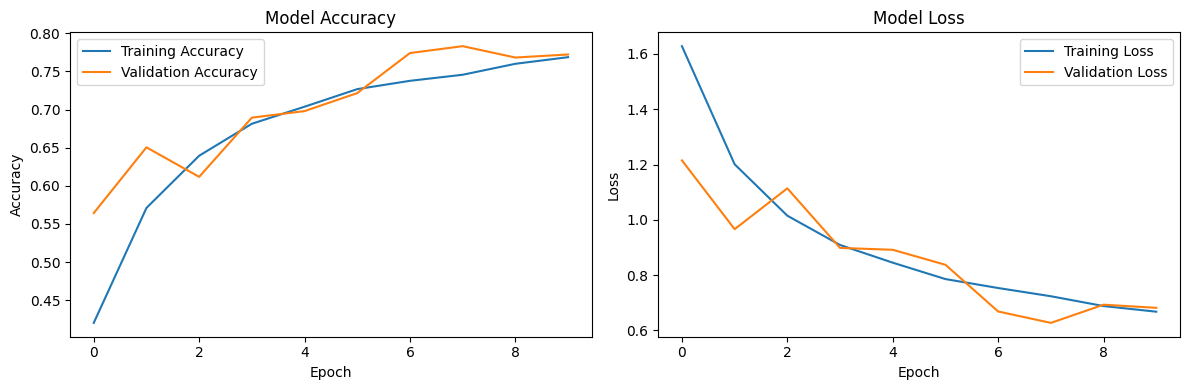

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Custom CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.79      1000
           1       0.88      0.91      0.89      1000
           2       0.68      0.71      0.69      1000
           3       0.64      0.66      0.65      1000
           4       0.81      0.71      0.75      1000
           5       0.75      0.70      0.72      1000
           6       0.69      0.92      0.79      1000
           7       0.90      0.78      0.84      1000
           8       0.96      0.78      0.86      1000
           9       0.76      0.93      0.84      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



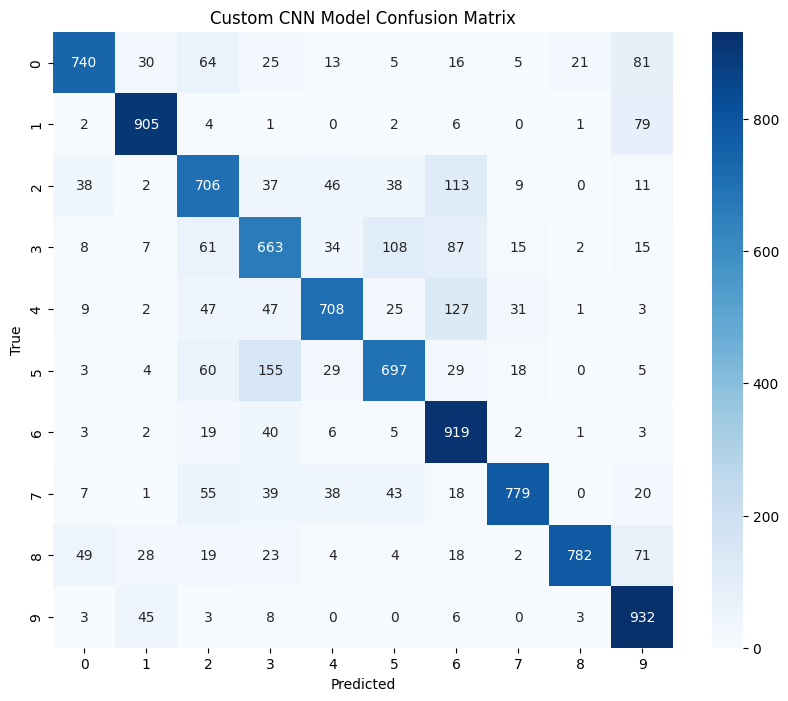


Training Transfer Learning model...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.4041 - loss: 1.7738 - val_accuracy: 0.5539 - val_loss: 1.2627 - learning_rate: 0.0010
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5182 - loss: 1.3725 - val_accuracy: 0.5803 - val_loss: 1.2021 - learning_rate: 0.0010
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5334 - loss: 1.3179 - val_accuracy: 0.5907 - val_loss: 1.1640 - learning_rate: 0.0010
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5450 - loss: 1.2968 - val_accuracy: 0.5898 - val_loss: 1.1663 - learning_rate: 0.0010
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5521 - loss: 1.2669 - val_accuracy: 0.5924 - val_loss: 1.1507 - learning_rate: 0.0010
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5619 - loss: 1.2526 - val_accuracy: 0.5968 - val_loss: 1.1455 - learning_rate: 0.0010
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5633 - loss: 1.2396

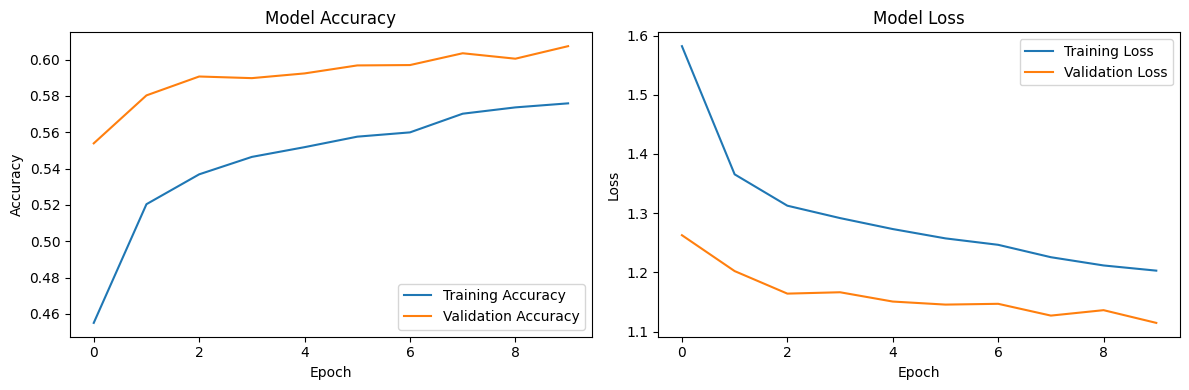

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

Transfer Learning Model Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1000
           1       0.68      0.66      0.67      1000
           2       0.61      0.44      0.51      1000
           3       0.47      0.39      0.43      1000
           4       0.61      0.45      0.52      1000
           5       0.52      0.57      0.54      1000
           6       0.50      0.82      0.62      1000
           7       0.71      0.66      0.68      1000
           8       0.72      0.76      0.74      1000
           9       0.61      0.65      0.63      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.60     10000
weighted avg       0.61      0.61      0.60     10000



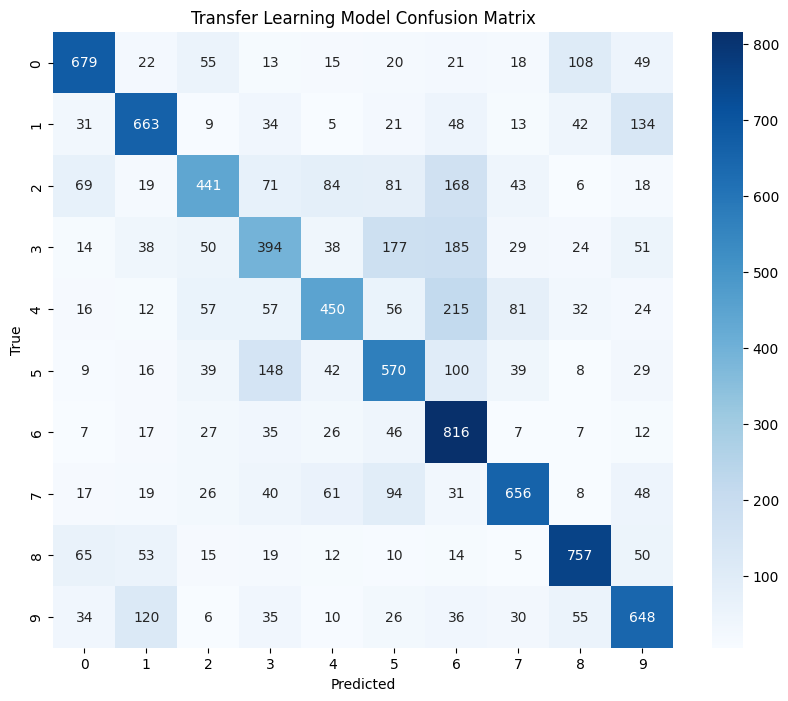

In [7]:
def main():
    # Load and preprocess data
    X_train, y_train, X_test, y_test = load_and_preprocess_data()

    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        zoom_range=0.1
    )
    datagen.fit(X_train)

    # Create models
    custom_model = build_custom_cnn()
    transfer_model = build_transfer_learning_model()

    # Compile models
    for model, name in [(custom_model, 'Custom CNN'), (transfer_model, 'Transfer Learning')]:
        print(f"\nTraining {name} model...")

        # Compile model
        model.compile(
            optimizer=optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        # Callbacks
        callbacks_list = [
            callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            ),
            callbacks.LearningRateScheduler(lr_schedule),
            callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.1,
                patience=5,
                min_lr=1e-6
            )
        ]

        # Train model
        history = model.fit(
            datagen.flow(X_train, y_train, batch_size=64),
            epochs=10,
            validation_data=(X_test, y_test),
            callbacks=callbacks_list
        )

        # Plot training history
        plot_history(history)

        # Evaluate model
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(y_test, axis=1)

        # Print classification report
        print(f"\n{name} Model Classification Report:")
        print(classification_report(y_test_classes, y_pred_classes))

        # Plot confusion matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            confusion_matrix(y_test_classes, y_pred_classes),
            annot=True,
            fmt='d',
            cmap='Blues'
        )
        plt.title(f'{name} Model Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

if __name__ == "__main__":
    main()